In [71]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

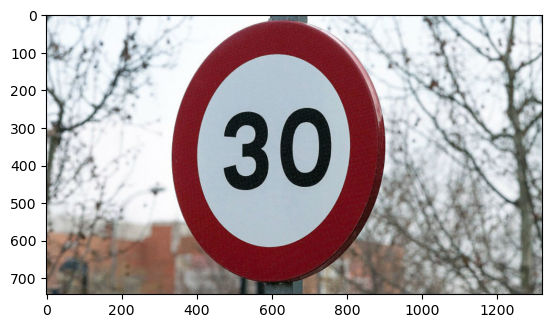

In [72]:
img = cv.imread('st30.jpg',cv.IMREAD_COLOR)
#img = cv.imread('60lejos.jpeg',cv.IMREAD_COLOR)

plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

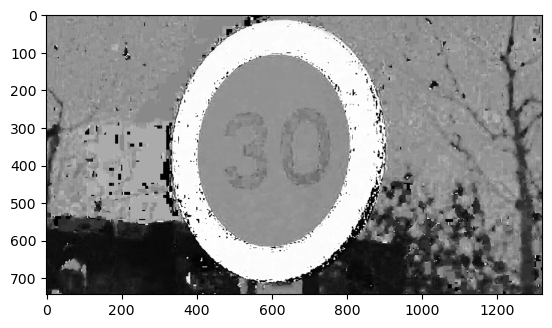

In [73]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
h,s,v = cv.split(hsv)

plt.imshow(h,cmap='gray')

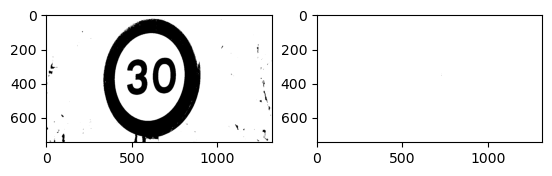

In [74]:
b,g,r = cv.split(img)
aux, gray = cv.threshold(b, 60, 255, cv.THRESH_BINARY)

rd = cv.add(r,g)
rf = cv.add(rd,b)
aux, prueba = cv.threshold(rf, 0, 255, cv.THRESH_BINARY)

plt.subplot(1,2,1)
plt.imshow(gray, cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(prueba, cmap = 'gray')

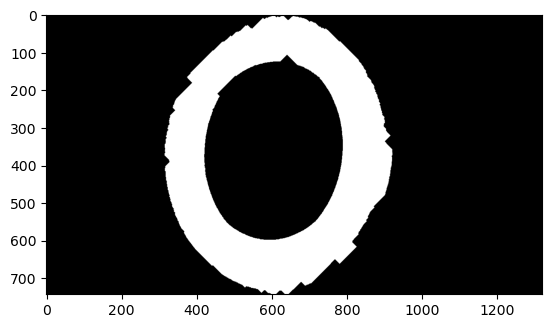

In [75]:
gray_circle = cv.bitwise_not(gray)
gray_circle = cv.morphologyEx(gray_circle, cv.MORPH_HITMISS, np.array([[0,1,0],[1,-1,1],[0,1,0]], np.uint8), iterations=25)
gray_circle = cv.morphologyEx(gray_circle, cv.MORPH_DILATE, np.array([[0,1,0],[1,-1,1],[0,1,0]], np.uint8), iterations=45)

plt.imshow(gray_circle, cmap = 'gray')

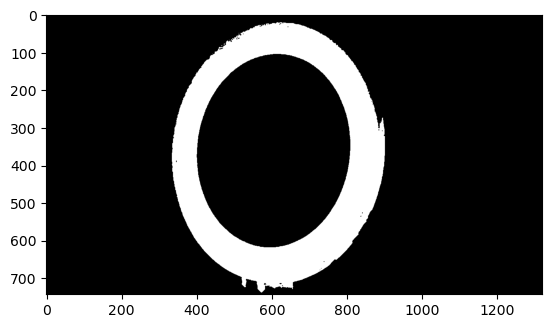

In [76]:
gray_circle = gray_circle & cv.bitwise_not(gray)
gray_circle = cv.medianBlur(gray_circle, 3)

plt.imshow(gray_circle, cmap = 'gray')

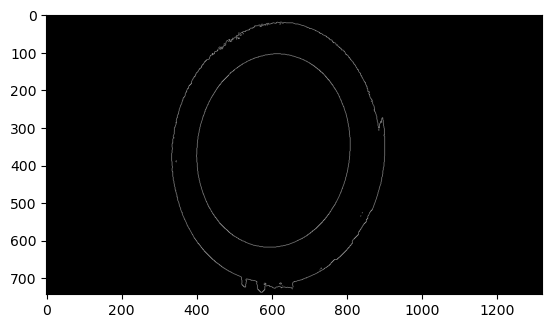

In [77]:
edged = cv.Canny(gray_circle, 30, 200) 

plt.imshow(edged, cmap = 'gray')

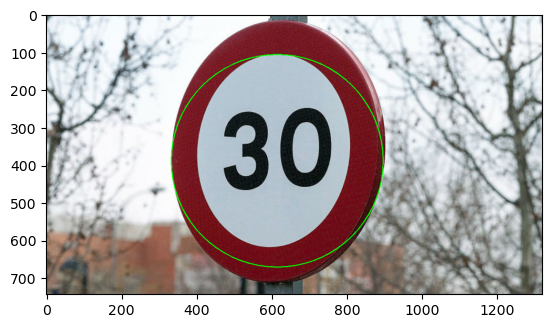

In [78]:
minDist = 100
param1 = 30 #500
param2 = 110 #200 
minRadius = 200
maxRadius = int(edged.shape[0]/2) #10

circles = cv.HoughCircles(edged, cv.HOUGH_GRADIENT, dp=1.9, minDist=minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
circles = np.uint16(np.around(circles))

img_with_circles = img.copy()

for c in circles[0,:]:
    a, b, r = c[0], c[1], c[2]
    cv.circle(img_with_circles, (a, b), r, (0, 255, 0), 2)

plt.imshow(cv.cvtColor(img_with_circles,cv.COLOR_BGR2RGB))

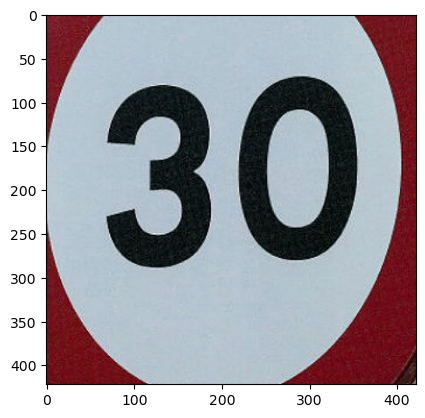

In [79]:
a = circles[0][0][0]
b = circles[0][0][1]
r = circles[0][0][2]
r = int(r-r/4)

cropped = img[b-r:b+r, a-r:a+r]

plt.imshow(cv.cvtColor(cropped,cv.COLOR_BGR2RGB))

In [80]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

text = pytesseract.image_to_string(cropped, config='--psm 11')
print("La velocidad limite es " + text)

La velocidad limite es 30

